In [1]:
import pandas as pd
import os

In [2]:
path = './Datasets/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'

files = [file for file in os.listdir(path) if not file.startswith('.')]  ## Ignore hidden files
my_data = pd.DataFrame()

for file in files:
    cur_data = pd.read_csv(path+file,header=None,skiprows=[0])
    my_data = pd.concat([my_data,cur_data])


my_data.head()


,0,1,2,3,4,5
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
my_data= my_data[my_data[0]!='Order ID']

In [4]:
my_data = my_data.dropna(how='all')

In [5]:
my_data.columns = ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address']
my_data = my_data.dropna(how='all')
my_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [74]:
my_data.to_csv("./Datasets/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv",index=False)

In [2]:
## Reading concatenated data 
all_data = pd.read_csv("./Datasets/Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv")
display(all_data.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [3]:
#nan_df = all_data[all_data.isna().any(axis=1)]
#display(nan_df.head())
#
#all_data = all_data.dropna(how='all')
#all_data.head()

In [4]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [5]:
## Add City Column

def get_city(address):
    cty = address.split(",")
    if len(cty)<3:
        return "NA"
    else :
        return cty[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [6]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

#all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


## Data Exploration!
### Question 1: What was the best month for sales? How much was earned that month?

In [7]:
#all_data[['Price Each','Month']].groupby(['Month']).sum()

all_data.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06
2,1871052592,13449,2.188885e+06,2.202022e+06
3,2564810956,17005,2.791208e+06,2.807100e+06
4,3387347100,20558,3.367671e+06,3.390670e+06
5,3345871523,18667,3.135125e+06,3.152607e+06
6,2932976072,15253,2.562026e+06,2.577802e+06
7,3284139576,16072,2.632540e+06,2.647776e+06
8,2899373917,13448,2.230345e+06,2.244468e+06
9,2948726831,13109,2.084992e+06,2.097560e+06


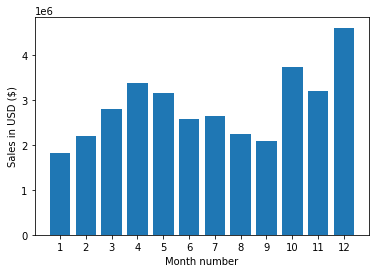

In [8]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2: What city sold the most product?

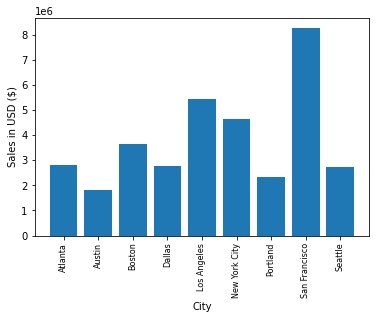

In [9]:
import matplotlib.pyplot as plt

x_key = [city for city, df in all_data.groupby(['City'])]

plt.bar(x_key,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(x_key, rotation='vertical', size=8)
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [10]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,30
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14,38
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14,38
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9,27


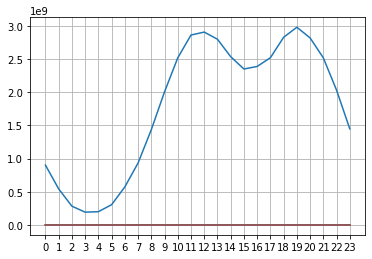

In [11]:
x_val = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(x_val, all_data.groupby(['Hour']).sum(['Sales']))
plt.xticks(x_val)
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
df3=pd.DataFrame(df2['Grouped'].value_counts())
df3.reset_index(inplace=True)
df3.columns=['Group Products','Record Count']
df3.head()

,Group Products,Record Count
0,"iPhone,Lightning Charging Cable",882
1,"Google Phone,USB-C Charging Cable",856
2,"iPhone,Wired Headphones",361
3,"Vareebadd Phone,USB-C Charging Cable",312
4,"Google Phone,Wired Headphones",303


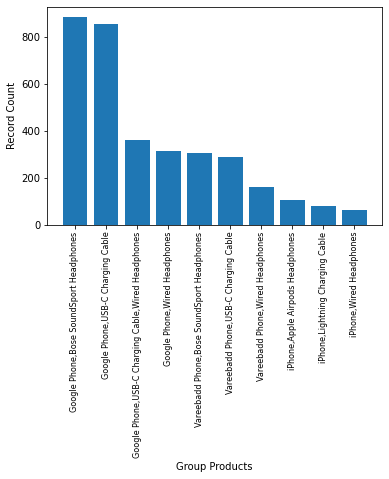

In [59]:
import matplotlib.pyplot as plt
df3 = df3.head(n=10)
x_key = [product for product, df in df3.groupby(['Group Products'])]

plt.bar(x_key,df3['Record Count'])
plt.xlabel('Group Products')
plt.ylabel('Record Count')
plt.xticks(x_key, rotation='vertical', size=8)
plt.show()


### What product sold the most? Why do you think it sold the most?

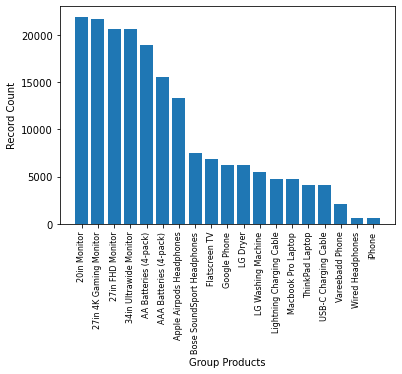

In [60]:
df_product = pd.DataFrame(all_data['Product'].value_counts())
df_product.reset_index(inplace=True)
df_product.columns=['Products','Record Count']

#df.head()
keys = [pair for pair, df in df_product.groupby(['Products'])]
plt.bar(keys,df_product['Record Count'])
plt.xlabel('Group Products')
plt.ylabel('Record Count')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


#### References :-
    
https://github.com/KeithGalli/Pandas-Data-Science-Tasks